# Team - 17

# Week Activity-14

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read the dataset
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# checking the columns and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# checking null values
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no missing values.Dataset is clear.

In [6]:
# checking the shape of dataframe,no of rows and columns
data.shape

(167, 10)

In given dataset'exports', 'health', 'imports' are given in percentage of gdpp.
This features would be converted to their actual values.

In [8]:
data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)

In [10]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,304.0,232.0,1371.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,46830.0,10961.0,81309.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,76400.0,8296.0,62440.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,77625.0,3565.0,53444.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,677222.0,89792.0,876692.0,19100,1.44,76.8,2.13,12200


In [11]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,3.479887e+06,4.378211e+05,2.877954e+06,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.604850e+07,1.201577e+06,1.298468e+07,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.000000e+01,6.200000e+01,1.000000e+01,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,5.712500e+03,1.217500e+03,8.340500e+03,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,7.978500e+04,1.461900e+04,9.343500e+04,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,1.248918e+06,1.297330e+05,1.253216e+06,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,1.929375e+08,8.565900e+06,1.565550e+08,125000.000000,104.000000,82.800000,7.490000,105000.000000


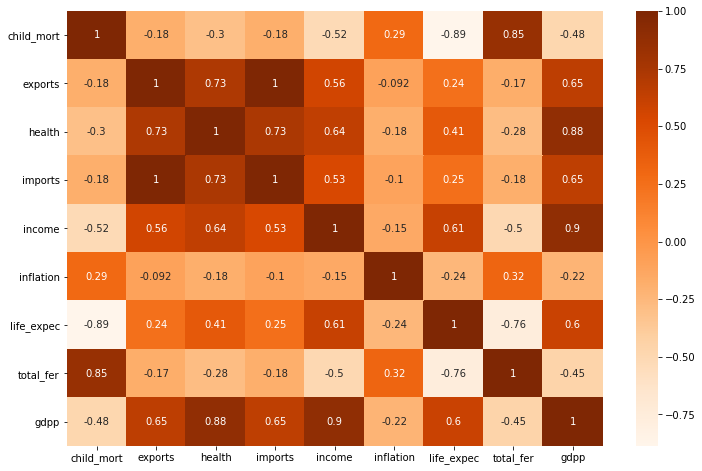

In [20]:
#Data visualization using heat map
plt.figure(figsize = (12,8))  
sns.heatmap(data.corr(),annot = True, cmap='Oranges')
plt.show()

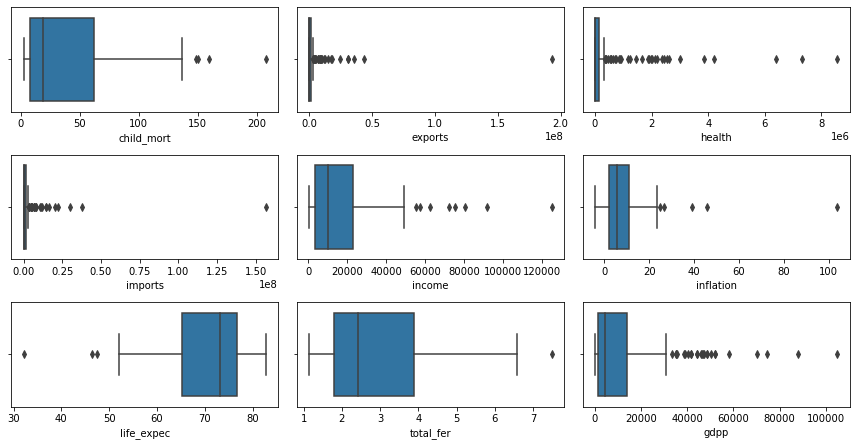

In [21]:
#finding Outliers
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(data.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(data[feature])
    plt.tight_layout()

Outliers for feature like exports, imports, health, income features are more in developed countries with high socio-economic and health conditions. 

Also Outliers for features like 'child_mort', 'inflation', 'life_expec', 'total_fer' are at critical socio-economic and health conditions.

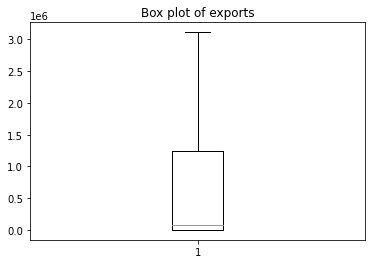

In [24]:
Q1 = data['exports'].quantile(0.25)
Q3 = data['exports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data['exports']=np.where(data['exports']>upper_limit,upper_limit,np.where(data['exports']<lower_limit,lower_limit,data['exports']))

plt.boxplot(data['exports'])
plt.title('Box plot of exports')
plt.show()

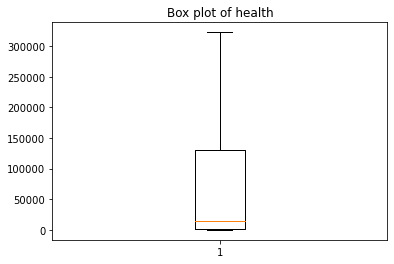

In [25]:
Q1 = data['health'].quantile(0.25)
Q3 = data['health'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data['health']=np.where(data['health']>upper_limit,upper_limit,np.where(data['health']<lower_limit,lower_limit,data['health']))
plt.boxplot(data['health'])
plt.title('Box plot of health')
plt.show()

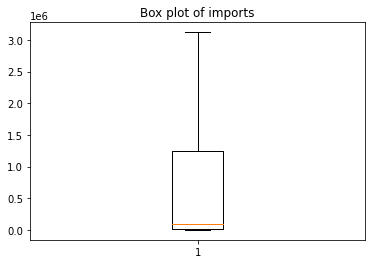

In [26]:
Q1 = data['imports'].quantile(0.25)
Q3 = data['imports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data['imports']=np.where(data['imports']>upper_limit,upper_limit,np.where(data['imports']<lower_limit,lower_limit,data['imports']))
plt.boxplot(data['imports'])
plt.title('Box plot of imports')
plt.show()

In [27]:
data.iloc[:, 1:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,304.0,232.0,1371.0,1610,9.44,56.2,5.82,553
1,16.6,46830.0,10961.0,81309.0,9930,4.49,76.3,1.65,4090
2,27.3,76400.0,8296.0,62440.0,12900,16.10,76.5,2.89,4460
3,119.0,77625.0,3565.0,53444.0,5900,22.40,60.1,6.16,3530
4,10.3,677222.0,89792.0,876692.0,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,41105.0,4633.0,46480.0,2950,2.62,63.0,3.50,2970
163,17.1,519480.0,89505.0,320760.0,16500,45.90,75.4,2.47,13500
164,23.3,12353.0,1179.0,13768.0,4490,12.10,73.1,1.95,1310
165,56.3,5148.0,891.0,5908.0,4480,23.60,67.5,4.67,1310


In [28]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data.iloc[:,1:])

In [29]:
#Clustering Kmeans
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[1502.9999999999995, 697.8163832657507, 425.9782841286804, 346.7908030097682, 303.05281061575, 260.2127837075543, 232.11494620598862, 207.48198375560247, 190.2396494215373, 176.40221344165437]


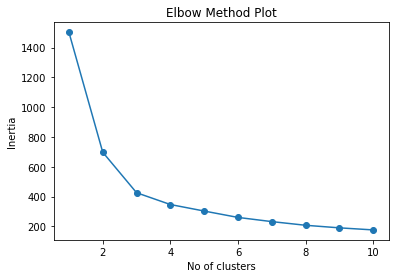

In [30]:
plt.plot(ks,inertia,'-o')
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[1 0 0 1 0 0 0 2 2 0 2 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 2 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 1 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


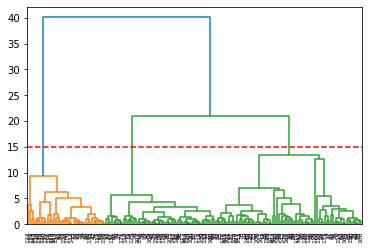

In [32]:
#Implementing hierarchical clustering
from scipy.cluster.hierarchy import linkage,dendrogram

dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(15,0,3000,colors="red",linestyles="dashed")
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
aghc=cluster.fit_predict(scaled_data)
aghc

array([0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0], dtype=int64)

In [34]:
country_cluster= data.iloc[:,:]
country_cluster= pd.concat([country_cluster, pd.DataFrame(model_kmeans.labels_, columns=['cluster_id_km'])], axis = 1)
country_cluster = pd.concat([country_cluster, pd.DataFrame(cluster.labels_, columns=['cluster_id_hc'])], axis = 1)
country_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hc
0,Afghanistan,90.2,304.0,232.0,1371.0,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,46830.0,10961.0,81309.0,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,76400.0,8296.0,62440.0,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,77625.0,3565.0,53444.0,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,677222.0,89792.0,876692.0,19100,1.44,76.8,2.13,12200,0,2


In [35]:
print(country_cluster['cluster_id_km'].value_counts())
print(country_cluster['cluster_id_hc'].value_counts())


0    81
1    48
2    38
Name: cluster_id_km, dtype: int64
0    73
2    55
1    39
Name: cluster_id_hc, dtype: int64


In [36]:
print("Cluster 0 of Hierarchical Clustering model")
print(country_cluster[country_cluster['cluster_id_hc'] == 0].country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(country_cluster[country_cluster['cluster_id_hc'] == 1].country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(country_cluster[country_cluster['cluster_id_hc'] == 2].country.unique())

Cluster 0 of Hierarchical Clustering model
['Afghanistan' 'Algeria' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Bolivia'
 'Botswana' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Fiji' 'Gabon' 'Gambia' 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iraq' 'Jordan' 'Kenya' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Philippines' 'Rwanda'
 'Samoa' 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Tonga' 'Turkmenistan'
 'Uganda' 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Yemen' 'Zambia']
Cluster 1 of Hierarchical Clustering model
['Australia' 'Austria' 'Bahamas' 'Bahrain' 'Belgium' 'Brunei' 'Canada'
 'Cyprus' 

Listing the countries in each clusters,formed as a result of kmeans clustering method

In [37]:
print("Cluster 0 of KMeans model")
print(country_cluster[country_cluster['cluster_id_km'] == 0].country.unique())

print("Cluster 1 of KMeans model")
print(country_cluster[country_cluster['cluster_id_km'] == 1].country.unique())

print("Cluster 2 of KMeans model")
print(country_cluster[country_cluster['cluster_id_km'] == 2].country.unique())

Cluster 0 of KMeans model
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia'
 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives'
 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Myanmar' 'Nepal' 'Panama' 'Paraguay' 'Peru' 'Philippines'
 'Poland' 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'Serbia' 'Seychelles'
 'Sri Lanka' 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan'
 'Thailand' 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam']
Cluster 1 of KMeans model


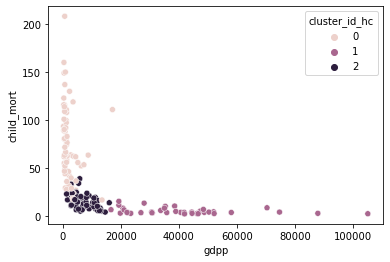

In [38]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['child_mort'],hue=country_cluster['cluster_id_hc'])
plt.show()

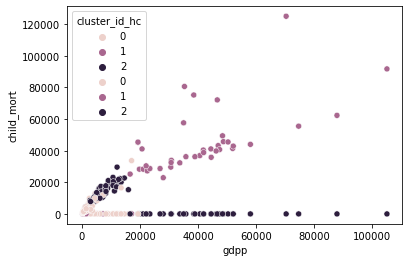

In [40]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['child_mort'],hue=country_cluster['cluster_id_km'])
sns.scatterplot(country_cluster['gdpp'],country_cluster['income'],hue=country_cluster['cluster_id_hc'])
plt.show()

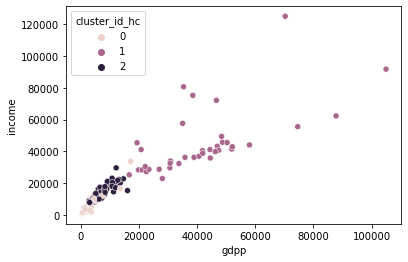

In [41]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['income'],hue=country_cluster['cluster_id_hc'])
plt.show()

<AxesSubplot:xlabel='gdpp', ylabel='income'>

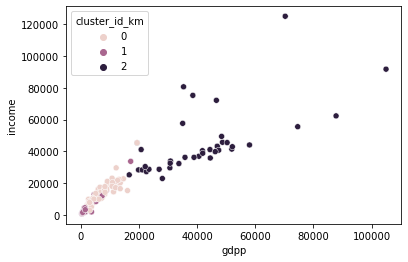

In [42]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['income'],hue=country_cluster['cluster_id_km'])

<AxesSubplot:xlabel='income', ylabel='child_mort'>

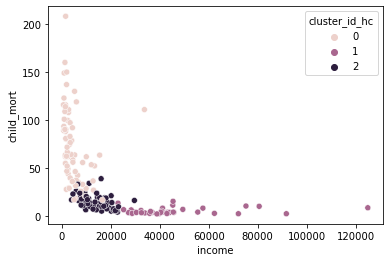

In [43]:
sns.scatterplot(country_cluster['income'],country_cluster['child_mort'],hue=country_cluster['cluster_id_hc'])

<AxesSubplot:xlabel='income', ylabel='child_mort'>

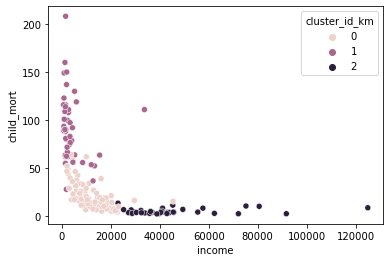

In [44]:
sns.scatterplot(country_cluster['income'],country_cluster['child_mort'],hue=country_cluster['cluster_id_km'])

<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

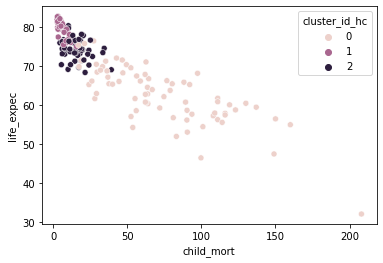

In [45]:
sns.scatterplot(country_cluster['child_mort'],country_cluster['life_expec'],hue=country_cluster['cluster_id_hc'])


<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

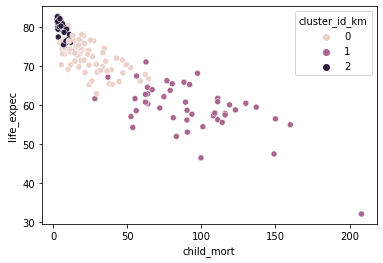

In [46]:
sns.scatterplot(country_cluster['child_mort'],country_cluster['life_expec'],hue=country_cluster['cluster_id_km'])


<AxesSubplot:xlabel='health', ylabel='life_expec'>

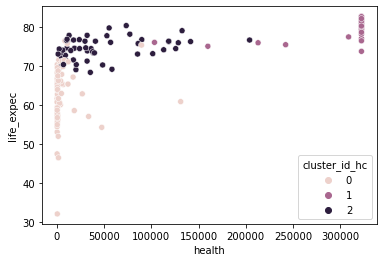

In [47]:
sns.scatterplot(country_cluster['health'],country_cluster['life_expec'],hue=country_cluster['cluster_id_hc'])

<AxesSubplot:xlabel='health', ylabel='life_expec'>

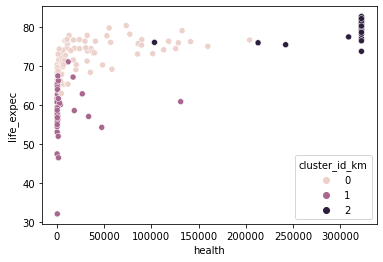

In [48]:
sns.scatterplot(country_cluster['health'],country_cluster['life_expec'],hue=country_cluster['cluster_id_km'])

Hierarchical Clustering model is chosen as final model as Kmeans

In [49]:
print("Countries that are in the direst need of aid")
print(country_cluster[country_cluster['cluster_id_hc'] == 0].country.unique())

Countries that are in the direst need of aid
['Afghanistan' 'Algeria' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Bolivia'
 'Botswana' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Fiji' 'Gabon' 'Gambia' 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iraq' 'Jordan' 'Kenya' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Niger' 'Nigeria' 'Pakistan' 'Philippines' 'Rwanda'
 'Samoa' 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Tonga' 'Turkmenistan'
 'Uganda' 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Yemen' 'Zambia']
